In [1]:
from functions import *  #this allows the use of all the functions as if they were defined inside this file

This part is to check the settings.ini file and its parameters.

In [2]:
f = open('settings.ini')
settings = json.load(f)
 
for i in settings:
    print(i, end=': ')
    print(settings[i])
 
f.close()

fSampling: 10000000.0
quantizationBits: 16
scenarioDuration: 5.05
SV_PRN_ID: 1
CRCpolynomial: A23DCB
SYNCpattern: 0101100000
TAILpattern: 000000
SVIDlength: 6
MIDlength: 4
MBODYlength_TX: 80
MBODYlength_ACK: 30
CRClength: 24
nPRN_x_Symbol: 1
nChip_x_PRN: 4092
chipRate: 1023000.0
maxDoppler: 100000.0


The N_ACK.csv file is coming from the user receiver, it contains the message ID and if that message needs to be ACK or NACK

In [3]:
f = open('N_ACK.csv')
csv_file = csv.reader(f)
N_ACK = []
for row in csv_file:
        N_ACK.append(row)


for i in range(len(N_ACK)-1):
    if(N_ACK[i+1][1]=='1'):
        msg=createMessageACK(settings['SYNCpattern'],settings['SV_PRN_ID'],int(N_ACK[i+1][0]))
    if(N_ACK[i+1][1]=='0'):
        msg=createMessageNACK(settings['SYNCpattern'],settings['SV_PRN_ID'],int(N_ACK[i+1][0]))
    print(msg)

[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 0 0]
[0 1 0 1 1 0 0 0

This part plots the origina orbital data regarding the Doppler shift, and also che interpolated Doppler shift from the function GetDopplerShift,
wich returns the interpolated Doppler shift at arbitrary sampling period, number of samples and starting time.

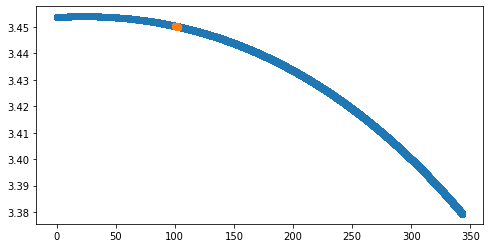

In [12]:
orbitalData = pd.read_csv('OrbitalDATA.txt', delim_whitespace=True)

dopplerFreqSamples = orbitalData['DopplerShift[Hz]'].dropna().to_numpy()
originalSamplingPeriod = 0.01
interpSamplingPeriod = 2.44E-6
StartTime = 100
numInterpSamples=1000000 

interpDopplerShift=GetDopplerShift(dopplerFreqSamples, originalSamplingPeriod, StartTime, numInterpSamples, interpSamplingPeriod)

SampleTime = (np.asarray(range(0,len(dopplerFreqSamples))))*originalSamplingPeriod
InterpSampleTime = (np.asarray(range(0,numInterpSamples)))*interpSamplingPeriod
InterpSampleTime = np.asarray([i+StartTime for i in InterpSampleTime])

plt.figure(figsize=(8, 4))
plt.scatter(SampleTime, dopplerFreqSamples)
plt.scatter(InterpSampleTime, interpDopplerShift)

This parts does the same interpolation process, but for FSPL

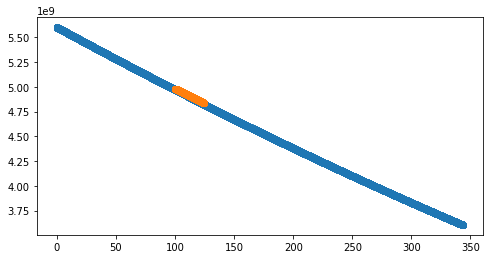

In [5]:
FSPL_Samples = orbitalData['FSPL'].dropna().to_numpy()

SampleTime = (np.asarray(range(0,len(FSPL_Samples))))*originalSamplingPeriod
originalSamplingPeriod = 0.01
interpSamplingPeriod = 2.44E-6
StartTime = 100
numInterpSamples=1000000 

interpDopplerShift=GetFSPL(FSPL_Samples, originalSamplingPeriod, StartTime, numInterpSamples, interpSamplingPeriod)


InterpSampleTime = (np.asarray(range(0,numInterpSamples)))*interpSamplingPeriod
InterpSampleTime = np.asarray([i+StartTime for i in InterpSampleTime])

plt.figure(figsize=(8, 4))
plt.scatter(SampleTime, FSPL_Samples)
plt.scatter(InterpSampleTime, interpDopplerShift)

Quantizing the I and Q samples (randomly created in this example)

In [9]:
Iarray = (np.random.rand(100)-0.5)*2.2
Qarray = (np.random.rand(100)-0.5)*2.2

print(Iarray[0:5])
print(Qarray[0:5])

Iarray = quantization(Iarray,16,-1,1)
Qarray = quantization(Qarray,16,-1,1)

print(Iarray[0:5])
print(Qarray[0:5])

[ 0.96784965 -0.90688581 -0.40716764 -0.45560397 -0.59347349]
[-0.17721402 -0.06834777  0.16988584  1.01608491  0.02109153]
[10505   497  3164  2906  2170]
[ 4715  5339  6705 11463  5852]


Writing the samples inside a file, first a binary one and then a text (human readable one)

In [11]:
file=open('signal.bin', 'wb')

writeFileBin(file,Iarray,Qarray)

file.close()

file=open('signal.txt', 'w')

writeFileChar(file,Iarray,Qarray)

file.close()